In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle


In [7]:
 df=pd.read_csv('Rainfall.csv')

In [17]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [13]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
print(df.dtypes)


day                         int64
pressure                  float64
maxtemp                   float64
temparature               float64
mintemp                   float64
dewpoint                  float64
humidity                    int64
cloud                       int64
rainfall                   object
sunshine                  float64
         winddirection    float64
windspeed                 float64
dtype: object


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [19]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [21]:
df.columns= df.columns.str.strip()

In [25]:
df=df.drop(columns=['day'])

In [27]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [41]:
df.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [31]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [39]:
 df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['winddirection'].median())

In [45]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [47]:
df['rainfall']=df['rainfall'].map({"yes":1, "no":0})

In [49]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [51]:
# EDA

In [53]:
df.shape

(366, 11)

In [55]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.669399
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.370072
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.975000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,70.000000


In [57]:
# setting plo style
sns.set(style="whitegrid")

In [59]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

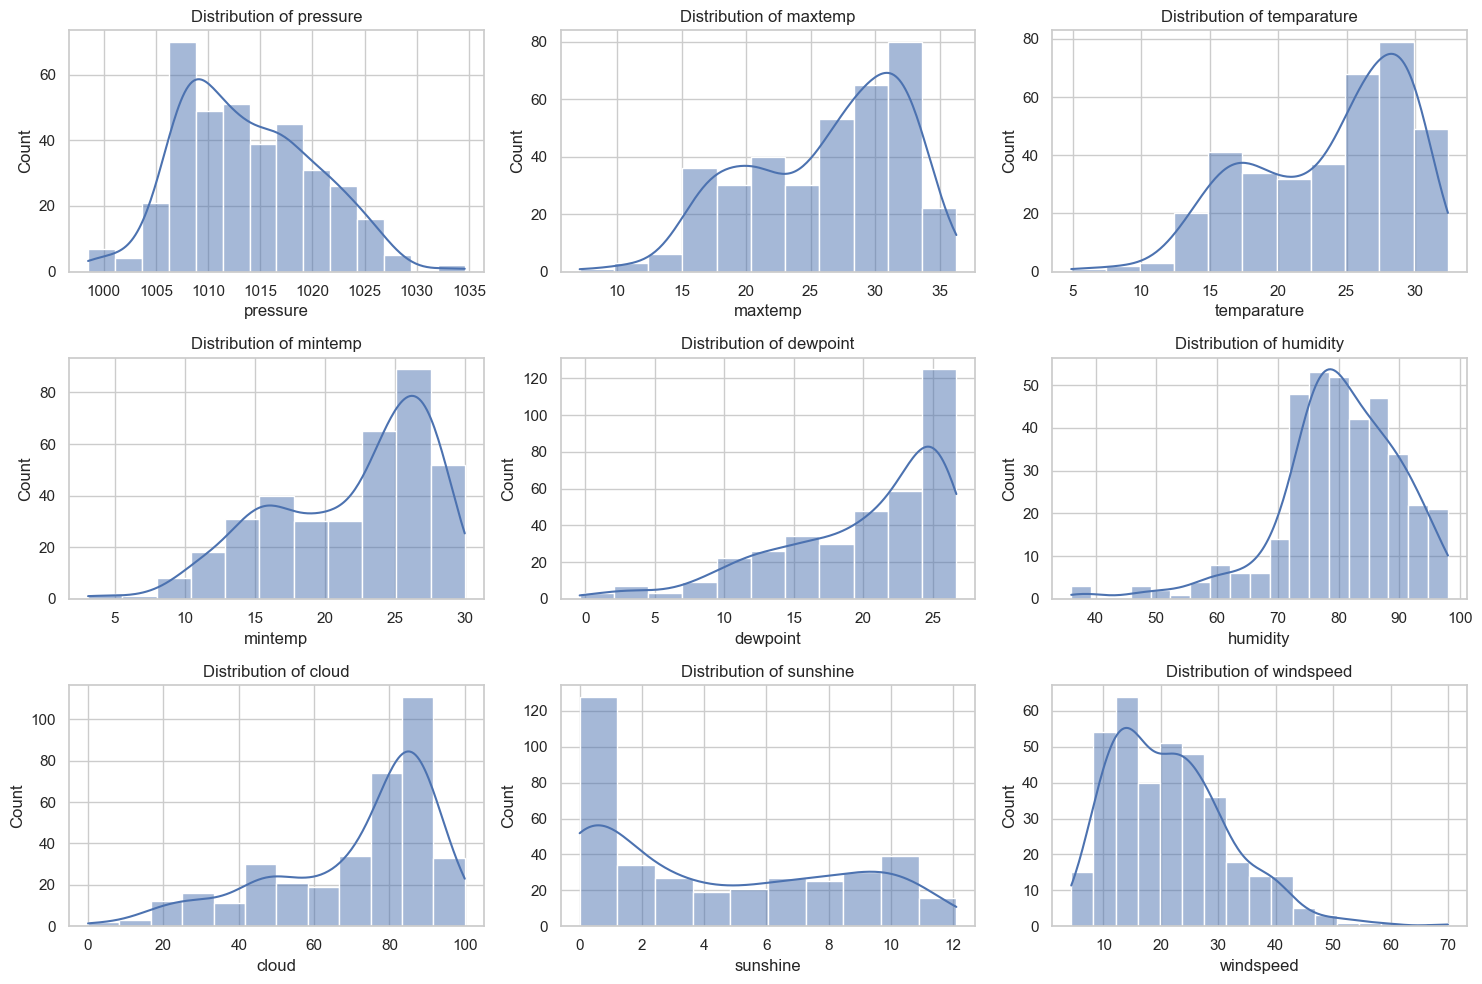

In [67]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine','windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

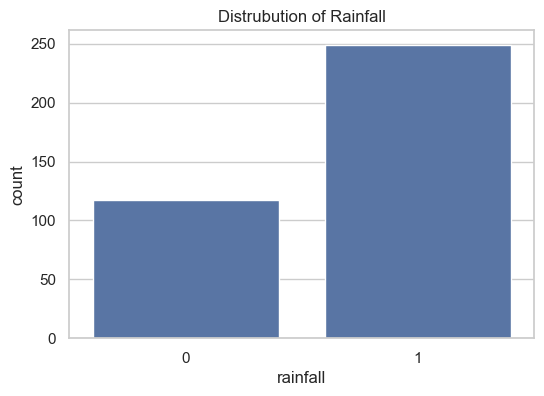

In [69]:
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall', data=df)
plt.title('Distrubution of Rainfall')
plt.show()

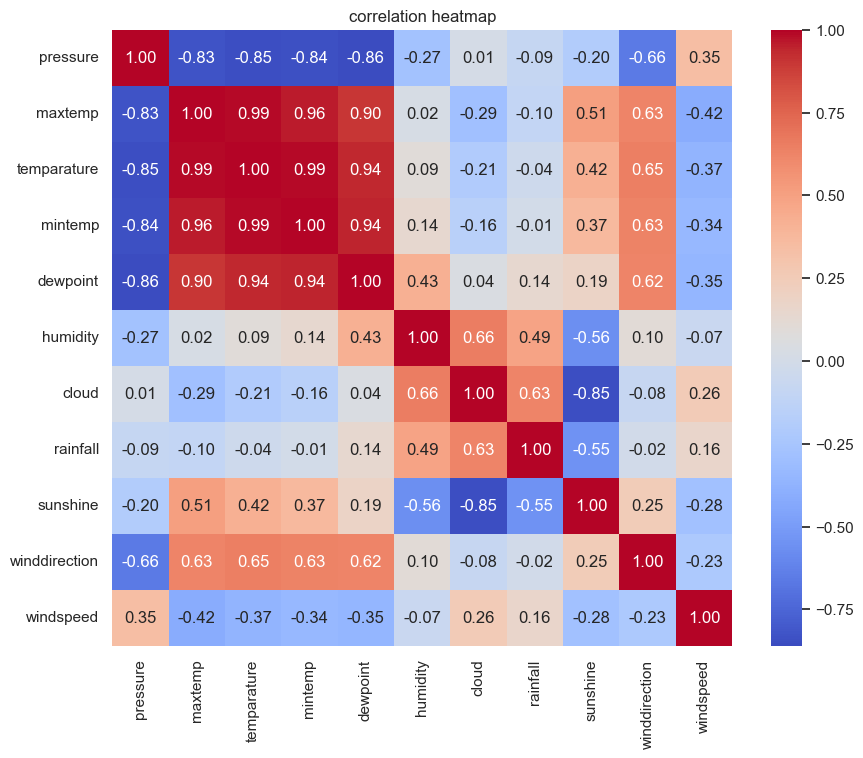

In [73]:
# Correlational matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation heatmap')
plt.show()

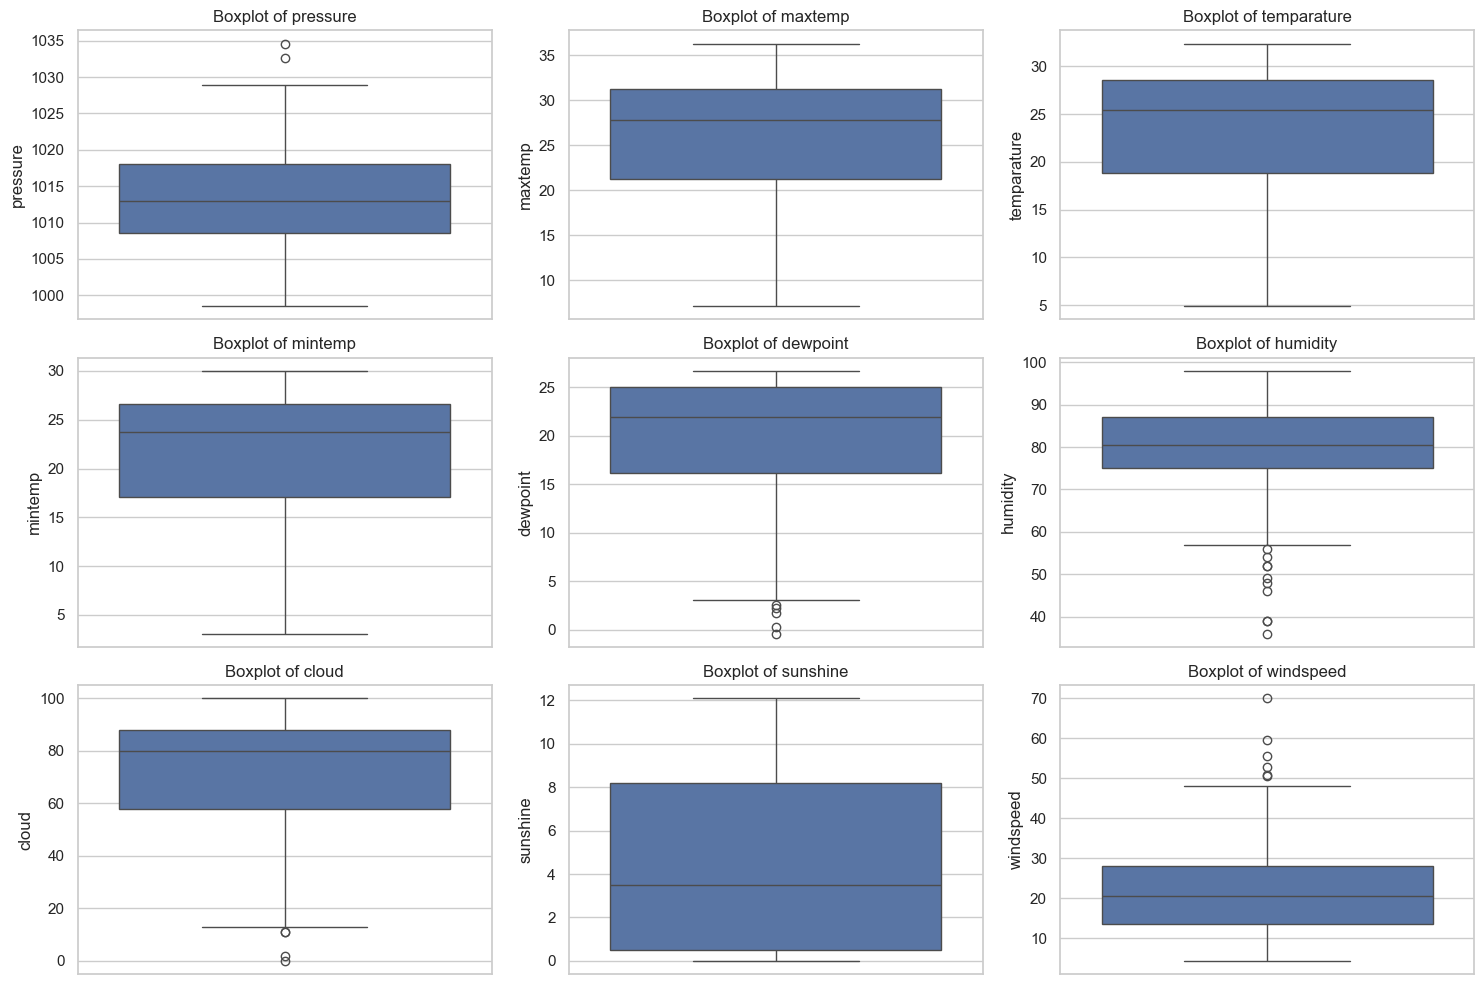

In [77]:
plt.figure(figsize=(15,10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine','windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [79]:
 # data processing

df=df.drop(columns=['maxtemp', 'temparature', 'mintemp'])


In [83]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [85]:
# separate majority and minority class
df_maj = df[df['rainfall']==1]
df_min = df[df['rainfall']==0]

In [91]:
print(df_maj.shape)
print(df_min.shape)

(249, 8)
(117, 8)


In [95]:
#downsample majority class to match count
df_maj_ds = resample(df_maj, replace=False, n_samples = len(df_min), random_state=42)

In [97]:
print(df_maj_ds.shape)

(117, 8)


In [99]:
df_ds= pd.concat([df_maj_ds, df_min])

In [103]:
df_ds.shape

(234, 8)

In [105]:
df_ds['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [109]:
#shuffle dataset
df_ds=df_ds.sample(frac=1, random_state=42).reset_index(drop=True)

In [111]:
df_ds.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [117]:
# split features and target
X=df_ds.drop(columns='rainfall')
Y=df_ds['rainfall'] 

In [125]:
#splitting data into train and test data
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)


In [119]:
rf_model=RandomForestClassifier(random_state=42)
param_grid_rf={
    "n_estimators":[50,100,200],
    "max_features": ['sqrt', 'log2'],
    "max_depth": [None, 10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
    }

In [129]:
# hyper parameter tuning
grid_search_rf= GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [133]:
best_rf_model=grid_search_rf.best_estimator_
print("best paramenters for Random Forest:", grid_search_rf.best_params_)

best paramenters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [137]:
 # model evaluation
cv_scores=cross_val_score(best_rf_model, X_train, Y_train,cv=5)
print("Cross Validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross Validation scores: [0.71052632 0.81578947 0.83783784 0.83783784 0.89189189]
Mean cross-validation score: 0.8187766714082503


In [147]:
 # test performance
Y_pred = best_rf_model.predict(X_test)

print("Accuracy", accuracy_score(Y_test, Y_pred))
print("Test set confusion matrix:\n" ,confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Accuracy 0.7446808510638298
Test set confusion matrix:
 [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [149]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [151]:
# Prediction of unknown data

input_data=(1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud','sunshine','winddirection', 'windspeed']) 

In [153]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [155]:
prediction = best_rf_model.predict(input_df)

In [165]:
print('prediction result:', "Rainfall" if prediction[0]==1 else "No Rainfall")

prediction result: Rainfall


In [169]:
# save the model
model_data = {"model": best_rf_model, "feature_names":X.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

In [171]:
# load saved model

import pickle
import pandas as pd

with open("rainfall_prediction_model.pkl", "rb") as f:
    model_data=pickle.load(f)

In [175]:
model=model_data['model']
feature_names = model_data['feature_names']

In [179]:
input_data=(1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)
input_df = pd.DataFrame([input_data], columns=feature_names)

In [181]:
prediction = best_rf_model.predict(input_df)
print('prediction result:', "Rainfall" if prediction[0]==1 else "No Rainfall")

prediction result: Rainfall
